In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [12]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

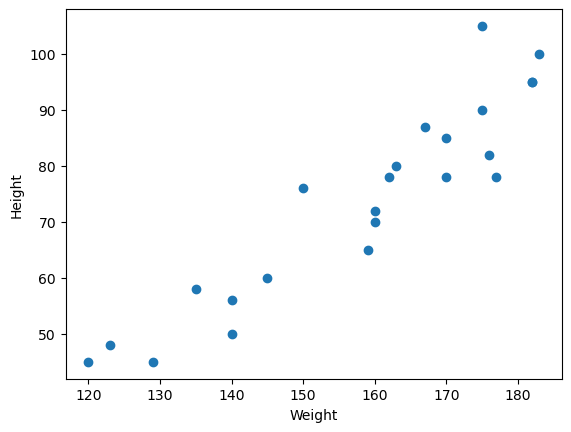

In [13]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [14]:
correlation_matrix = df.corr()

In [15]:
correlation_matrix

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


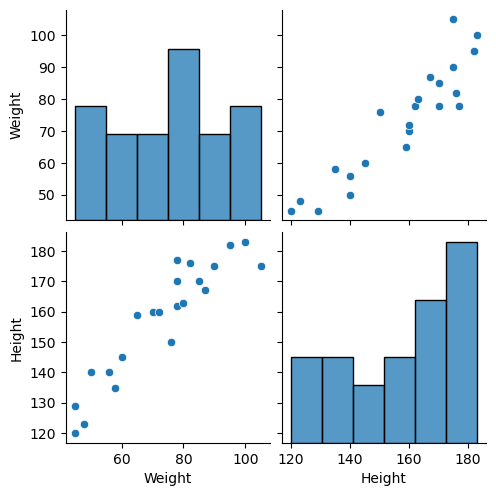

In [16]:
sns.pairplot(df)

In [20]:
X = df[['Weight']]
y = df['Height']

In [21]:
print(X)

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72


In [22]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [74]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80
    Weight
15      78
9       78
0       45
8       95
17      65
12     105
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64
15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scalar = StandardScaler()

In [77]:
X_train = scalar.fit_transform(X_train)

In [78]:
print(X_train)

[[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]]


In [79]:
X_test = scalar.transform(X_test)

In [80]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
regression = LinearRegression(n_jobs = -1)

In [83]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [84]:
print('Coefficient or slope: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


In [85]:
regression.predict(X_test)

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

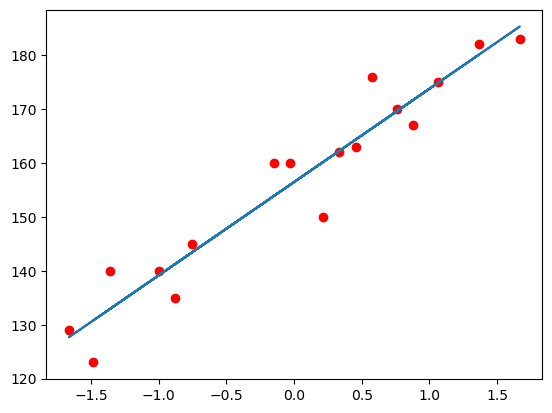

In [86]:
plt.scatter(X_train, y_train, c= 'red')
plt.plot(X_train, regression.predict(X_train))

## prediction of test data

In [87]:
y_pred = regression.predict(X_test)

In [88]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [89]:
y_test.shape
#y_pred.shape

(6,)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R - Square

R^2 = 1 - SSR/SST

In [92]:
from sklearn.metrics import r2_score

In [96]:
score = r2_score(y_test, y_pred)

In [97]:
score

0.7360826717981276

## Multiple Linear Regression

In [99]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\economic_index.csv')

In [100]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [101]:
df.tail

<bound method NDFrame.tail of     Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0            0  2017     12           2.75                5.3         1464
1            1  2017     11           2.50                5.3         1394
2            2  2017     10           2.50                5.3         1357
3            3  2017      9           2.50                5.3         1293
4            4  2017      8           2.50                5.4         1256
5            5  2017      7           2.50                5.6         1254
6            6  2017      6           2.50                5.5         1234
7            7  2017      5           2.25                5.5         1195
8            8  2017      4           2.25                5.5         1159
9            9  2017      3           2.25                5.6         1167
10          10  2017      2           2.00                5.7         1130
11          11  2017      1           2.00                5.9         

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [103]:
df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [105]:
matrix = df.corr()
matrix

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [106]:
df = df.drop(['year','month','Unnamed: 0'] ,axis = 1)

In [107]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [108]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

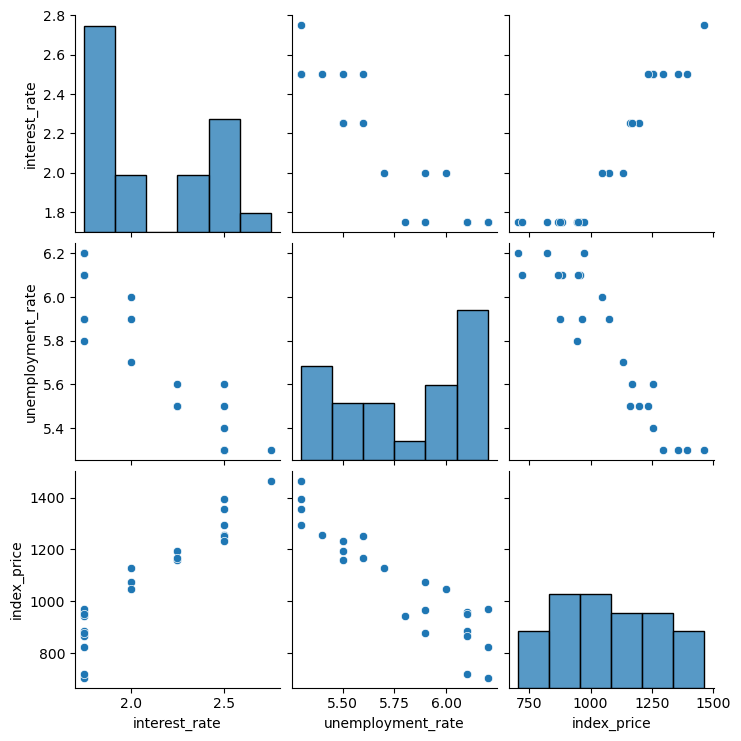

In [109]:
sns.pairplot(df)

In [112]:
corr_matrix = df.corr()
corr_matrix

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

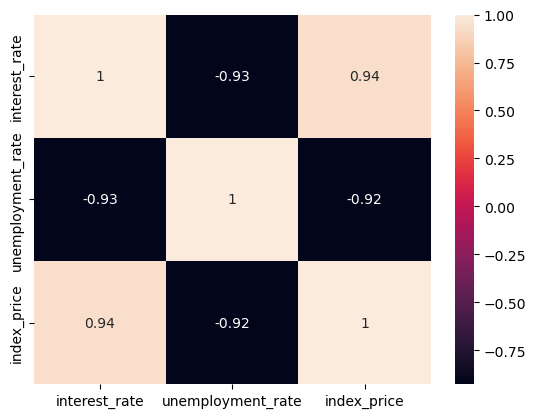

In [114]:
sns.heatmap(corr_matrix, annot = True)

In [115]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [116]:
print(X)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [117]:
print(y)

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [120]:
import seaborn as sns

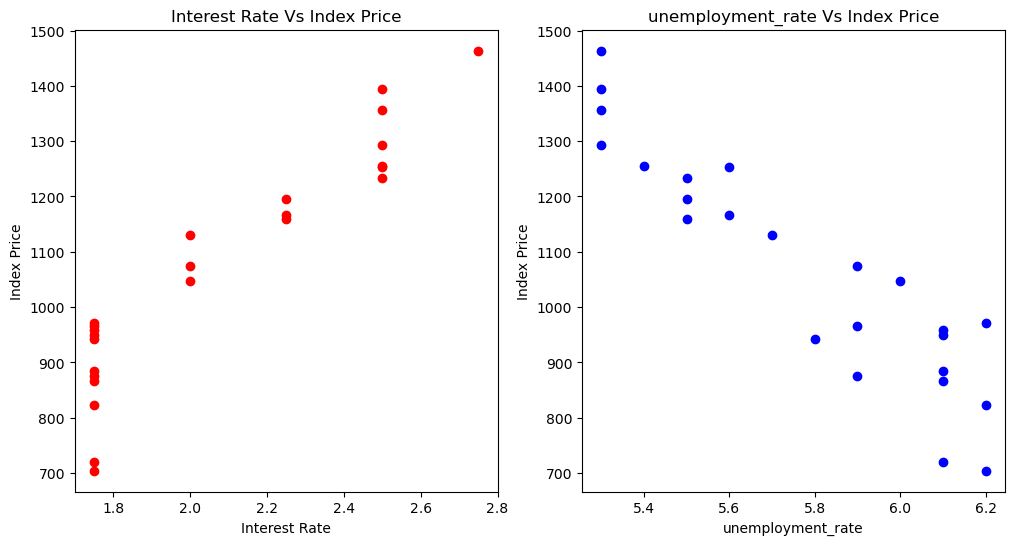

In [129]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(df['interest_rate'], df['index_price'], c = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate Vs Index Price')
plt.subplot(1,2,2)
plt.scatter(df['unemployment_rate'], df['index_price'], c = 'blue')
plt.xlabel('unemployment_rate')
plt.ylabel('Index Price')
plt.title('unemployment_rate Vs Index Price')
plt.show()

<Axes: xlabel='interest_rate', ylabel='index_price'>

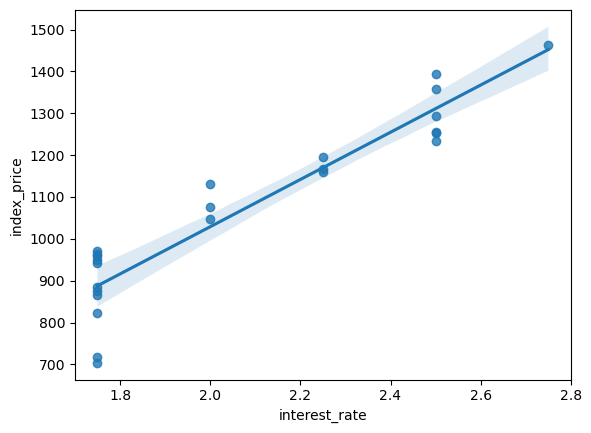

In [130]:
sns.regplot(x = df['interest_rate'], y = df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

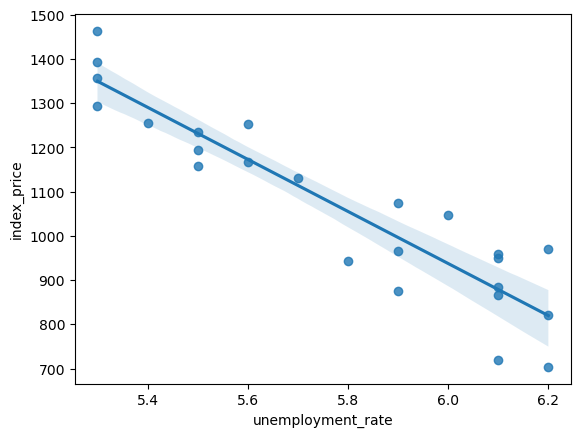

In [131]:
sns.regplot(x = df['unemployment_rate'], y = df['index_price'])

In [132]:
from sklearn.preprocessing import StandardScaler

In [134]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [135]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [136]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [137]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [138]:
regression.fit(X_train, y_train)

LinearRegression()

In [139]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv = 3)

In [140]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [141]:
## Prediction

In [142]:
y_pred = regression.predict(X_test)

In [143]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [144]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [145]:
score = r2_score(y_test, y_pred)

In [146]:
score

0.8278978091457142

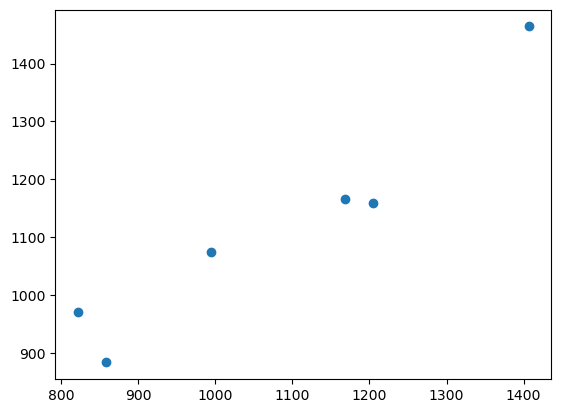

In [147]:
plt.scatter(y_pred, y_test)

In [148]:
residual = y_test - y_pred
print(residual)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


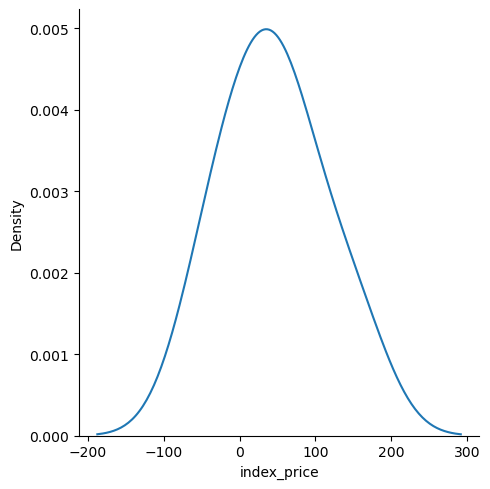

In [152]:
## Plot the Residual

sns.displot(x=residual, kind="kde")

Text(0, 0.5, 'residual')

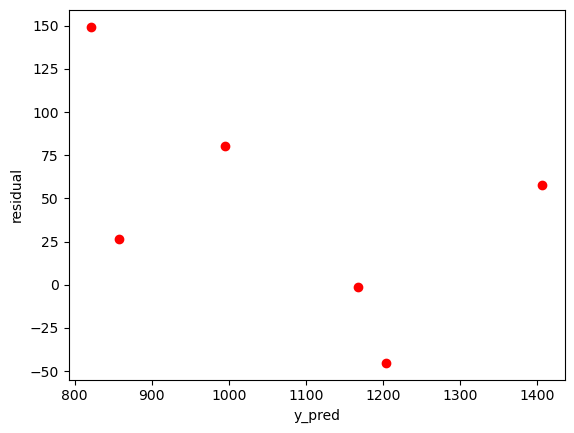

In [154]:
plt.scatter(y_pred, residual, c = 'red')
plt.xlabel('y_pred')
plt.ylabel('residual')

## Polynomial Regression

Text(0, 0.5, 'Y dataset')

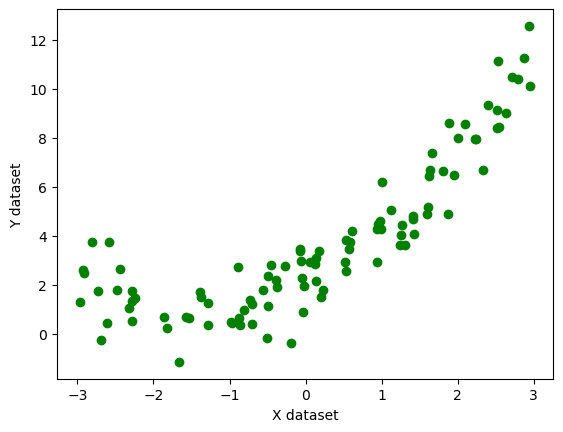

In [158]:
X = 6 * np.random.rand(100, 1) - 3

y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [161]:
from sklearn.linear_model import LinearRegression
regression_1 =  LinearRegression()

In [162]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [163]:
print('Coefficient or slope: ', regression_1.coef_)
print('Intercept: ', regression_1.intercept_)

Coefficient or slope:  [[1.42309118]]
Intercept:  [3.6462321]


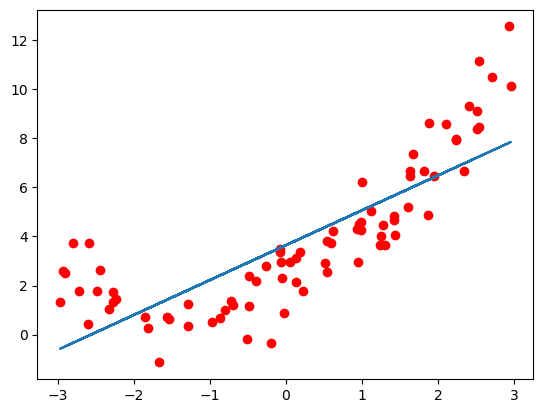

In [165]:
plt.scatter(X_train, y_train, c= 'red')
plt.plot(X_train, regression_1.predict(X_train))

In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [167]:
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [177]:
X_train

array([[ 1.66898867],
       [ 1.88160848],
       [-1.86026368],
       [ 0.13481835],
       [ 2.24137678],
       [ 1.25218241],
       [ 2.1034227 ],
       [-2.2771076 ],
       [ 0.51705638],
       [-2.4432865 ],
       [-0.19711594],
       [-2.60474028],
       [ 0.22548964],
       [-2.27821565],
       [ 0.13620359],
       [-0.86981467],
       [ 0.94218466],
       [ 0.93627056],
       [ 1.60759615],
       [-2.92894052],
       [ 2.53542871],
       [-1.81677776],
       [-0.26467005],
       [-0.07618348],
       [ 1.80883046],
       [-0.51243069],
       [-2.24190899],
       [-2.48037205],
       [ 2.71129971],
       [ 2.33960232],
       [ 0.53702251],
       [ 0.05757537],
       [ 2.54410609],
       [ 0.58679971],
       [ 0.98167126],
       [-0.0522944 ],
       [ 1.23821597],
       [ 0.61561562],
       [ 0.95682219],
       [ 1.43229874],
       [-2.80717078],
       [-0.03004134],
       [ 1.4195149 ],
       [-1.53408652],
       [ 1.95154468],
       [ 1

In [168]:
X_train_poly

array([[ 1.00000000e+00,  1.66898867e+00,  2.78552318e+00],
       [ 1.00000000e+00,  1.88160848e+00,  3.54045046e+00],
       [ 1.00000000e+00, -1.86026368e+00,  3.46058095e+00],
       [ 1.00000000e+00,  1.34818346e-01,  1.81759863e-02],
       [ 1.00000000e+00,  2.24137678e+00,  5.02376986e+00],
       [ 1.00000000e+00,  1.25218241e+00,  1.56796080e+00],
       [ 1.00000000e+00,  2.10342270e+00,  4.42438706e+00],
       [ 1.00000000e+00, -2.27710760e+00,  5.18521902e+00],
       [ 1.00000000e+00,  5.17056382e-01,  2.67347302e-01],
       [ 1.00000000e+00, -2.44328650e+00,  5.96964892e+00],
       [ 1.00000000e+00, -1.97115939e-01,  3.88546932e-02],
       [ 1.00000000e+00, -2.60474028e+00,  6.78467194e+00],
       [ 1.00000000e+00,  2.25489637e-01,  5.08455764e-02],
       [ 1.00000000e+00, -2.27821565e+00,  5.19026656e+00],
       [ 1.00000000e+00,  1.36203588e-01,  1.85514174e-02],
       [ 1.00000000e+00, -8.69814668e-01,  7.56577556e-01],
       [ 1.00000000e+00,  9.42184658e-01

In [170]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9307734344573055


In [172]:
print(regression.coef_)

[[0.         1.50809319 0.53646354]]


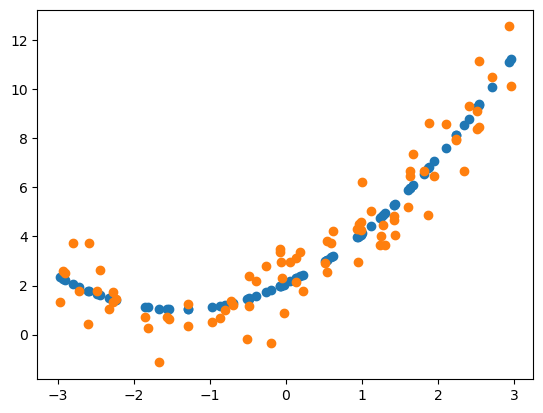

In [176]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [179]:
## for degree = 3

In [180]:
poly = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly_1 = poly.fit_transform(X_train)
X_test_poly_1 = poly.transform(X_test)

In [181]:
X_train_poly_1

array([[ 1.00000000e+00,  1.66898867e+00,  2.78552318e+00,
         4.64900663e+00],
       [ 1.00000000e+00,  1.88160848e+00,  3.54045046e+00,
         6.66174159e+00],
       [ 1.00000000e+00, -1.86026368e+00,  3.46058095e+00,
        -6.43759304e+00],
       [ 1.00000000e+00,  1.34818346e-01,  1.81759863e-02,
         2.45045640e-03],
       [ 1.00000000e+00,  2.24137678e+00,  5.02376986e+00,
         1.12601611e+01],
       [ 1.00000000e+00,  1.25218241e+00,  1.56796080e+00,
         1.96337294e+00],
       [ 1.00000000e+00,  2.10342270e+00,  4.42438706e+00,
         9.30635617e+00],
       [ 1.00000000e+00, -2.27710760e+00,  5.18521902e+00,
        -1.18073016e+01],
       [ 1.00000000e+00,  5.17056382e-01,  2.67347302e-01,
         1.38233628e-01],
       [ 1.00000000e+00, -2.44328650e+00,  5.96964892e+00,
        -1.45855626e+01],
       [ 1.00000000e+00, -1.97115939e-01,  3.88546932e-02,
        -7.65887932e-03],
       [ 1.00000000e+00, -2.60474028e+00,  6.78467194e+00,
      

In [182]:
regression = LinearRegression()
regression.fit(X_train_poly_1, y_train)
y_pred = regression.predict(X_test_poly_1)
score = r2_score(y_test, y_pred)
print(score)

0.9264288867594793


In [183]:
print(regression.coef_)

[[ 0.          1.63749415  0.5349618  -0.02337659]]


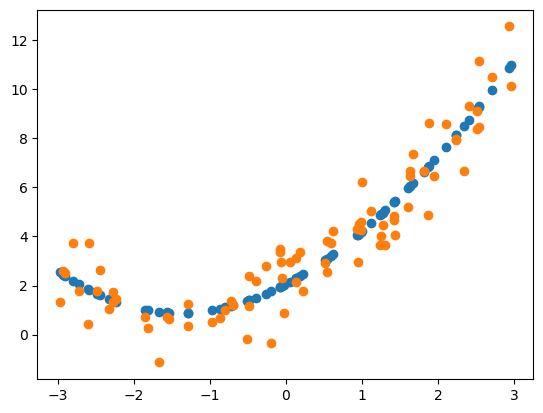

In [184]:
plt.scatter(X_train, regression.predict(X_train_poly_1))
plt.scatter(X_train, y_train)

## Pipeline Concepts

In [186]:
from sklearn.pipeline import Pipeline

In [187]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)])
    poly_regression.fit(X_train, y_train)

In [188]:
# 3 Prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

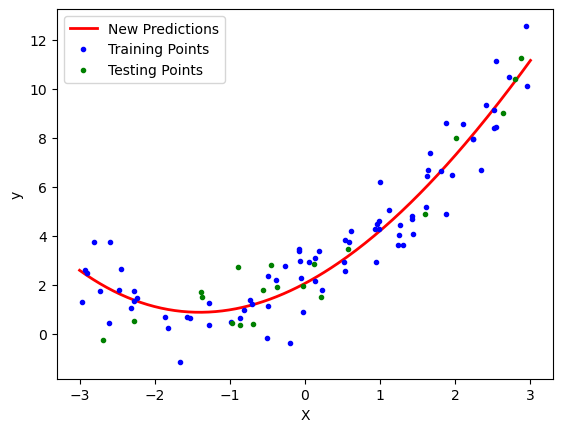

In [194]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'New Predictions')
plt.plot(X_train, y_train, 'b.', label = 'Training Points')
plt.plot(X_test, y_test, 'g.', label = 'Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [204]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new,y_pred_new,'r',label = 'Degree' + str(degree), linewidth = 2)
    plt.plot(X_train,y_train, 'b.', linewidth = 3)
    plt.plot(X_test,y_test, 'g.', linewidth = 3)
    plt.legend(loc = 'upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()

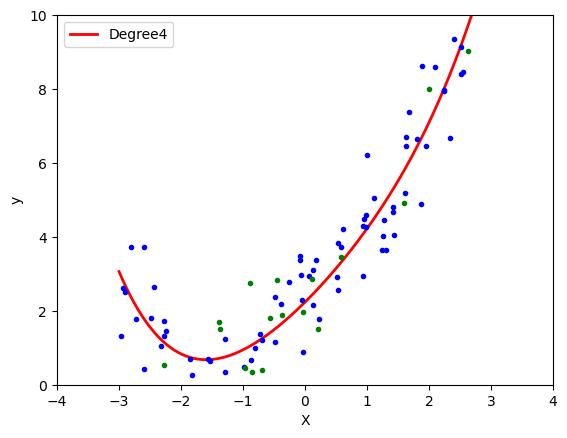

In [205]:
poly_regression(4)

## New Problem

In [207]:
df1 = pd.read_csv('C:\\Users\\user\\Downloads\\50_Startups.csv')

In [208]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [209]:
df1.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [211]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000
